In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the Data
file_path = '/Users/rohanpadaya/Desktop/pankit_assign/Stock_data_part2.csv'  
stock_data_2= pd.read_csv(file_path, low_memory=False)


In [3]:
stock_data_2.head()

,public_date,CAPEI,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,TICKER
0,31/01/2010,17.934,1.077,7.981,16.433,0.0,0.041,0.095,0.079,0.099,1.152,NaN,AIR
1,28/02/2010,17.554,1.077,7.981,16.085,0.0,0.041,0.095,0.079,0.099,1.128,NaN,AIR
2,31/03/2010,19.257,1.077,7.981,17.603,0.0,0.041,0.095,0.079,0.099,1.237,NaN,AIR
3,30/04/2010,18.304,0.898,9.293,19.349,0.0,0.037,0.086,0.067,0.097,1.197,NaN,AIR
4,31/05/2010,14.791,0.898,9.293,15.635,0.0,0.037,0.086,0.067,0.097,0.968,NaN,AIR


In [4]:
stock_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577832 entries, 0 to 577831
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   public_date  577832 non-null  object 
 1   CAPEI        546478 non-null  float64
 2   bm           547801 non-null  float64
 3   evm          571048 non-null  float64
 4   pe_exi       558489 non-null  float64
 5   dpr          375585 non-null  float64
 6   npm          548142 non-null  float64
 7   roa          569652 non-null  float64
 8   roe          538115 non-null  float64
 9   roce         566944 non-null  float64
 10  ptb          547801 non-null  float64
 11  divyield     214443 non-null  object 
 12  TICKER       567861 non-null  object 
dtypes: float64(10), object(3)
memory usage: 57.3+ MB


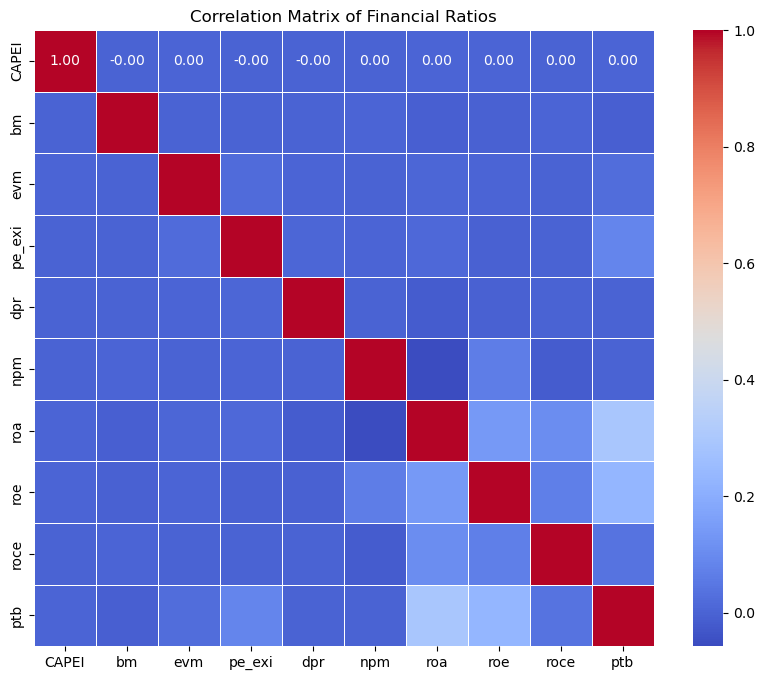

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant numerical columns for correlation analysis
numerical_columns = ['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce', 'ptb']

# Dropping rows with missing values in these columns for the purpose of correlation analysis
correlation_data = stock_data_2[numerical_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Financial Ratios')

# Save the plot as a PNG file
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/correlation_matrix.png')

plt.show()

In [6]:
import pandas as pd

# Exclude non-numeric columns
numeric_data = stock_data_2.select_dtypes(include=['float64'])

# Calculate Pearson correlation
pearson_corr = numeric_data.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Calculate Spearman correlation
spearman_corr = numeric_data.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
           CAPEI        bm       evm    pe_exi       dpr       npm       roa  \
CAPEI   1.000000 -0.000043 -0.000004 -0.000815  0.000169  0.000053  0.000012   
bm     -0.000043  1.000000  0.000011  0.000280 -0.000047  0.000048  0.000109   
evm    -0.000004  0.000011  1.000000 -0.000040  0.002905  0.000019  0.000021   
pe_exi -0.000815  0.000280 -0.000040  1.000000  0.012444  0.002319  0.028042   
dpr     0.000169 -0.000047  0.002905  0.012444  1.000000 -0.000292 -0.000289   
npm     0.000053  0.000048  0.000019  0.002319 -0.000292  1.000000  0.012229   
roa     0.000012  0.000109  0.000021  0.028042 -0.000289  0.012229  1.000000   
roe     0.000013  0.000017  0.000002 -0.000853 -0.001623  0.000228  0.031690   
roce   -0.000006 -0.000011 -0.000004  0.000748 -0.003385  0.000040 -0.000955   
ptb    -0.000303 -0.002867 -0.001069 -0.050850 -0.004452 -0.002162 -0.018976   

             roe      roce       ptb  
CAPEI   0.000013 -0.000006 -0.000303  
bm      0.000

In [7]:
import pandas as pd

# Load the dataset (assuming it's already loaded as 'stock_data_2')
# stock_data_2 = pd.read_csv('path_to_your_file.csv')  # Uncomment if you need to load the data

# Check for missing values in each column
missing_values = stock_data_2.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
public_date         0
CAPEI           31354
bm              30031
evm              6784
pe_exi          19343
dpr            202247
npm             29690
roa              8180
roe             39717
roce            10888
ptb             30031
divyield       363389
TICKER           9971
dtype: int64


In [8]:
# Impute missing values with the median for each column
stock_data_2_imputed = stock_data_2.copy()

for column in stock_data_2_imputed.columns:
    if stock_data_2_imputed[column].dtype in ['float64', 'int64']:
        stock_data_2_imputed[column].fillna(stock_data_2_imputed[column].median(), inplace=True)

# Verify that there are no more missing values
print(stock_data_2_imputed.isnull().sum())

public_date         0
CAPEI               0
bm                  0
evm                 0
pe_exi              0
dpr                 0
npm                 0
roa                 0
roe                 0
roce                0
ptb                 0
divyield       363389
TICKER           9971
dtype: int64


In [9]:
stock_data_2_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577832 entries, 0 to 577831
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   public_date  577832 non-null  object 
 1   CAPEI        577832 non-null  float64
 2   bm           577832 non-null  float64
 3   evm          577832 non-null  float64
 4   pe_exi       577832 non-null  float64
 5   dpr          577832 non-null  float64
 6   npm          577832 non-null  float64
 7   roa          577832 non-null  float64
 8   roe          577832 non-null  float64
 9   roce         577832 non-null  float64
 10  ptb          577832 non-null  float64
 11  divyield     214443 non-null  object 
 12  TICKER       567861 non-null  object 
dtypes: float64(10), object(3)
memory usage: 57.3+ MB


In [10]:
# Select the two financial ratios for clustering
selected_ratios = stock_data_2_imputed[['roa', 'pe_exi']]

# Standardize the data before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
selected_ratios_scaled = scaler.fit_transform(selected_ratios)

In [11]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with n_init explicitly set
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Set n_init to 10 explicitly
clusters = kmeans.fit_predict(selected_ratios_scaled)

# Add the cluster labels to the original data
stock_data_2_imputed['Cluster'] = clusters

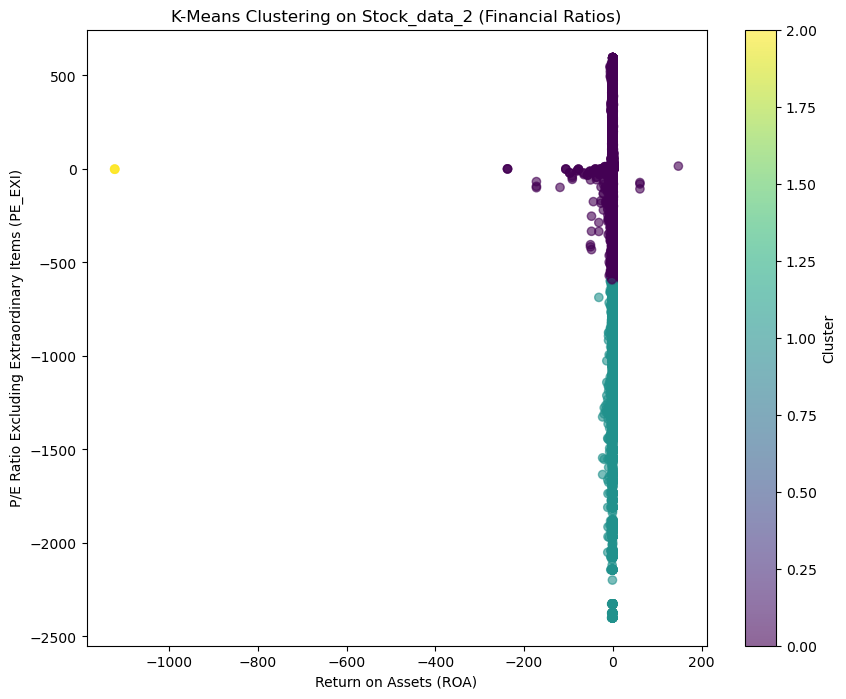

In [12]:
import matplotlib.pyplot as plt

# Create a scatter plot for the clusters
plt.figure(figsize=(10, 8))
plt.scatter(stock_data_2_imputed['roa'], stock_data_2_imputed['pe_exi'], c=stock_data_2_imputed['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Return on Assets (ROA)')
plt.ylabel('P/E Ratio Excluding Extraordinary Items (PE_EXI)')
plt.title('K-Means Clustering on Stock_data_2 (Financial Ratios)')
plt.colorbar(label='Cluster')

# Save the plot as a PNG file
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/K-Means Clustering.png')
plt.show() 

In [13]:
# Define the required time period
start_date = '2019-12-14'
end_date = '2020-03-20'

# Filter stock_data_2_imputed within the required time period
filtered_stock_data_2_period = stock_data_2_imputed[
    (stock_data_2_imputed['public_date'] >= start_date) & 
    (stock_data_2_imputed['public_date'] <= end_date)
]

# Check the number of records and unique TICKERs within this period
num_records = filtered_stock_data_2_period.shape[0]
num_unique_tickers = filtered_stock_data_2_period['TICKER'].nunique()

# Display the results
print(f"Number of records in stock_data_2_imputed within the period {start_date} to {end_date}: {num_records}")
print(f"Number of unique TICKERs in stock_data_2_imputed within this period: {num_unique_tickers}")

Number of records in stock_data_2_imputed within the period 2019-12-14 to 2020-03-20: 0
Number of unique TICKERs in stock_data_2_imputed within this period: 0


In [14]:
# Step 1: Load the Data
file_path = '/Users/rohanpadaya/Desktop/pankit_assign/Stock_data_part1.csv'  
stock_data_1 = pd.read_csv(file_path, low_memory=False)


In [15]:
print(stock_data_1.head())

   PERMNO        date  SHRCD TICKER                  COMNAM  PERMCO     BIDLO  \
0   10026  2019-08-20   11.0   JJSF  J & J SNACK FOODS CORP    7976  190.9700   
1   10026  2019-08-21   11.0   JJSF  J & J SNACK FOODS CORP    7976  188.5025   
2   10026  2019-08-22   11.0   JJSF  J & J SNACK FOODS CORP    7976  187.9800   
3   10026  2019-08-23   11.0   JJSF  J & J SNACK FOODS CORP    7976  185.5900   
4   10026  2019-08-26   11.0   JJSF  J & J SNACK FOODS CORP    7976  186.7000   

       ASKHI        PRC       VOL        RET        BID        ASK   SHROUT  \
0  196.74001  191.13000  136698.0  -0.020298  191.00000  191.13000  18841.0   
1  192.56000  189.35001  101583.0  -0.009313  189.17000  189.35001  18841.0   
2  190.39000  189.32001   92198.0  -0.000158  189.32001  189.50000  18841.0   
3  190.35001  186.14999   75522.0  -0.016744  186.14000  186.28000  18841.0   
4  191.39999  191.23000   81788.0   0.027290  191.03999  191.25000  18841.0   

     OPENPRC  NUMTRD    sprtrn  
0  19

In [16]:
stock_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938801 entries, 0 to 1938800
Data columns (total 17 columns):
 #   Column   Dtype  
---  ------   -----  
 0   PERMNO   int64  
 1   date     object 
 2   SHRCD    float64
 3   TICKER   object 
 4   COMNAM   object 
 5   PERMCO   int64  
 6   BIDLO    float64
 7   ASKHI    float64
 8   PRC      float64
 9   VOL      float64
 10  RET      object 
 11  BID      float64
 12  ASK      float64
 13  SHROUT   float64
 14  OPENPRC  float64
 15  NUMTRD   float64
 16  sprtrn   float64
dtypes: float64(11), int64(2), object(4)
memory usage: 251.5+ MB


In [17]:
# Convert the 'date' column to datetime format in the uncleaned data
stock_data_1['date'] = pd.to_datetime(stock_data_1['date'])

# Ensure 'TICKER' is consistent (e.g., remove any trailing spaces or convert to uppercase)
stock_data_1['TICKER'] = stock_data_1['TICKER'].str.strip().str.upper()

# Check for any remaining missing values
print(stock_data_1.isnull().sum())

# If 'RET' column has issues (e.g., non-numeric values), clean it
stock_data_1['RET'] = pd.to_numeric(stock_data_1['RET'], errors='coerce')

# Handle missing or non-numeric data (optional: you may choose to drop or impute)
stock_data_1.dropna(subset=['RET'], inplace=True)

# Display the cleaned dataset
print(stock_data_1.head())

PERMNO           0
date             0
SHRCD           24
TICKER       10218
COMNAM          24
PERMCO           0
BIDLO        11470
ASKHI        11470
PRC          11470
VOL          11470
RET           1276
BID          11479
ASK          11480
SHROUT         418
OPENPRC      51696
NUMTRD     1144054
sprtrn           0
dtype: int64
   PERMNO       date  SHRCD TICKER                  COMNAM  PERMCO     BIDLO  \
0   10026 2019-08-20   11.0   JJSF  J & J SNACK FOODS CORP    7976  190.9700   
1   10026 2019-08-21   11.0   JJSF  J & J SNACK FOODS CORP    7976  188.5025   
2   10026 2019-08-22   11.0   JJSF  J & J SNACK FOODS CORP    7976  187.9800   
3   10026 2019-08-23   11.0   JJSF  J & J SNACK FOODS CORP    7976  185.5900   
4   10026 2019-08-26   11.0   JJSF  J & J SNACK FOODS CORP    7976  186.7000   

       ASKHI        PRC       VOL       RET        BID        ASK   SHROUT  \
0  196.74001  191.13000  136698.0 -0.020298  191.00000  191.13000  18841.0   
1  192.56000  189.35001  10

In [18]:
# Drop rows where TICKER or RET are missing
stock_data_1.dropna(subset=['TICKER', 'RET'], inplace=True)

# For numerical columns, fill missing values with the median
numerical_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'BID', 'ASK', 'SHROUT', 'OPENPRC', 'NUMTRD']
stock_data_1[numerical_columns] = stock_data_1[numerical_columns].fillna(stock_data_1[numerical_columns].median())

# Verify the missing values again
print(stock_data_1.isnull().sum())

# Display the cleaned dataset
print(stock_data_1.head())

PERMNO     0
date       0
SHRCD      0
TICKER     0
COMNAM     0
PERMCO     0
BIDLO      0
ASKHI      0
PRC        0
VOL        0
RET        0
BID        0
ASK        0
SHROUT     0
OPENPRC    0
NUMTRD     0
sprtrn     0
dtype: int64
   PERMNO       date  SHRCD TICKER                  COMNAM  PERMCO     BIDLO  \
0   10026 2019-08-20   11.0   JJSF  J & J SNACK FOODS CORP    7976  190.9700   
1   10026 2019-08-21   11.0   JJSF  J & J SNACK FOODS CORP    7976  188.5025   
2   10026 2019-08-22   11.0   JJSF  J & J SNACK FOODS CORP    7976  187.9800   
3   10026 2019-08-23   11.0   JJSF  J & J SNACK FOODS CORP    7976  185.5900   
4   10026 2019-08-26   11.0   JJSF  J & J SNACK FOODS CORP    7976  186.7000   

       ASKHI        PRC       VOL       RET        BID        ASK   SHROUT  \
0  196.74001  191.13000  136698.0 -0.020298  191.00000  191.13000  18841.0   
1  192.56000  189.35001  101583.0 -0.009313  189.17000  189.35001  18841.0   
2  190.39000  189.32001   92198.0 -0.000158  189.32

In [19]:
stock_data_2_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577832 entries, 0 to 577831
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   public_date  577832 non-null  object 
 1   CAPEI        577832 non-null  float64
 2   bm           577832 non-null  float64
 3   evm          577832 non-null  float64
 4   pe_exi       577832 non-null  float64
 5   dpr          577832 non-null  float64
 6   npm          577832 non-null  float64
 7   roa          577832 non-null  float64
 8   roe          577832 non-null  float64
 9   roce         577832 non-null  float64
 10  ptb          577832 non-null  float64
 11  divyield     214443 non-null  object 
 12  TICKER       567861 non-null  object 
 13  Cluster      577832 non-null  int32  
dtypes: float64(10), int32(1), object(3)
memory usage: 59.5+ MB


In [20]:
# Convert date columns to datetime
stock_data_2_imputed['public_date'] = pd.to_datetime(stock_data_2_imputed['public_date'], format='%d/%m/%Y')
stock_data_1['date'] = pd.to_datetime(stock_data_1['date'])

# Filter the data for the relevant date range
date_filter_start = '2019-12-14'
date_filter_end = '2020-03-20'

stock_data_2_filtered = stock_data_2_imputed[
    (stock_data_2_imputed['public_date'] >= date_filter_start) & 
    (stock_data_2_imputed['public_date'] <= date_filter_end)
]

# Consider taking a sample if the dataset is still too large
stock_data_1_sample = stock_data_1.sample(frac=0.1, random_state=42)
stock_data_2_filtered_sample = stock_data_2_filtered.sample(frac=0.1, random_state=42)

print(f"Stock data 1 sample size: {stock_data_1_sample.shape}")
print(f"Stock data 2 filtered sample size: {stock_data_2_filtered_sample.shape}")

Stock data 1 sample size: (192675, 17)
Stock data 2 filtered sample size: (1078, 14)


In [21]:
# Step 1: Ensure date formats are consistent
stock_data_1['date'] = pd.to_datetime(stock_data_1['date'])
stock_data_2_filtered['public_date'] = pd.to_datetime(stock_data_2_filtered['public_date'])

# Step 2: Align date column names for the merge
stock_data_1.rename(columns={'date': 'Date'}, inplace=True)
stock_data_2_filtered.rename(columns={'public_date': 'Date'}, inplace=True)

# Step 3: Perform the merge on TICKER and Date
merged_data = pd.merge(stock_data_1, stock_data_2_filtered, on=['TICKER', 'Date'], how='inner')

# Check the result
print(f"Number of records in the merged dataset: {merged_data.shape[0]}")
print(f"Missing values in the merged dataset:\n{merged_data.isnull().sum()}")
print(merged_data.head())

/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_30611/4225868616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_2_filtered['public_date'] = pd.to_datetime(stock_data_2_filtered['public_date'])
/var/folders/h3/rgch6z5s2vl66pj31fc_j3w00000gn/T/ipykernel_30611/4225868616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_2_filtered.rename(columns={'public_date': 'Date'}, inplace=True)


Number of records in the merged dataset: 6988
Missing values in the merged dataset:
PERMNO         0
Date           0
SHRCD          0
TICKER         0
COMNAM         0
PERMCO         0
BIDLO          0
ASKHI          0
PRC            0
VOL            0
RET            0
BID            0
ASK            0
SHROUT         0
OPENPRC        0
NUMTRD         0
sprtrn         0
CAPEI          0
bm             0
evm            0
pe_exi         0
dpr            0
npm            0
roa            0
roe            0
roce           0
ptb            0
divyield    4221
Cluster        0
dtype: int64
   PERMNO       Date  SHRCD TICKER                           COMNAM  PERMCO  \
0   10026 2019-12-31   11.0   JJSF           J & J SNACK FOODS CORP    7976   
1   10026 2020-01-31   11.0   JJSF           J & J SNACK FOODS CORP    7976   
2   10032 2019-12-31   11.0   PLXS                      PLEXUS CORP    7980   
3   10032 2020-01-31   11.0   PLXS                      PLEXUS CORP    7980   
4   10044 2019-

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


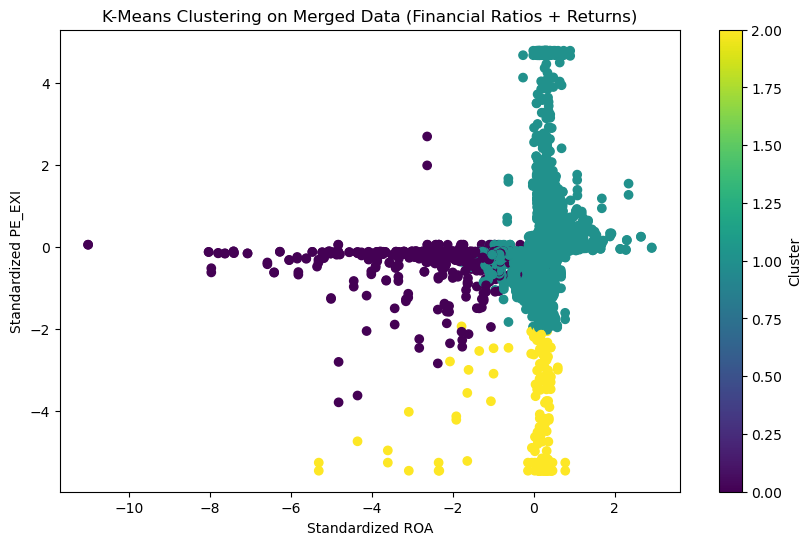

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering from the merged dataset
selected_features = merged_data[['roa', 'pe_exi', 'RET']]  # Including returns as a feature

# Standardize the selected features
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# Define the number of clusters (adjust this number based on your analysis)
num_clusters = 3  # Example: 3 clusters

# Initialize and fit the K-Means algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(selected_features_scaled)

# Add the cluster labels to your merged dataset
merged_data['Cluster'] = clusters

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(selected_features_scaled[:, 0], selected_features_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Standardized ROA')
plt.ylabel('Standardized PE_EXI')
plt.title('K-Means Clustering on Merged Data (Financial Ratios + Returns)')
plt.colorbar(label='Cluster')
plt.show()

# Save the plot if needed
plt.savefig("/Users/rohanpadaya/Desktop/pankit_assign/kmeans_clusters_merged.png")

In [23]:
# Define the two periods
period_1_start = '2019-12-14'
period_1_end = '2020-01-20'
period_2_start = '2020-02-14'
period_2_end = '2020-03-20'

# Filter the merged data for the two periods
data_period_1 = merged_data[(merged_data['Date'] >= period_1_start) & (merged_data['Date'] <= period_1_end)]
data_period_2 = merged_data[(merged_data['Date'] >= period_2_start) & (merged_data['Date'] <= period_2_end)]

# Display the first few rows of the filtered data to verify
print("Data for Period 1 (December 14, 2019 - January 20, 2020):")
print(data_period_1.head())

print("Data for Period 2 (February 14, 2020 - March 20, 2020):")
print(data_period_2.head())

Data for Period 1 (December 14, 2019 - January 20, 2020):
   PERMNO       Date  SHRCD TICKER                           COMNAM  PERMCO  \
0   10026 2019-12-31   11.0   JJSF           J & J SNACK FOODS CORP    7976   
2   10032 2019-12-31   11.0   PLXS                      PLEXUS CORP    7980   
4   10044 2019-12-31   11.0   RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW    7992   
6   10051 2019-12-31   11.0   HNGR                       HANGER INC    7999   
8   10104 2019-12-31   11.0   ORCL                      ORACLE CORP    8045   

      BIDLO   ASKHI     PRC        VOL  ...     evm  pe_exi    dpr    npm  \
0  184.0800  186.50  184.27    89104.0  ...  21.927  36.854  0.397  0.080   
2   76.9200   77.67   76.94   107469.0  ...  10.796  21.983  0.000  0.034   
4    9.1668    9.29    9.23     8284.0  ...  11.384  22.512  1.125  0.074   
6   27.3000   27.71   27.61   373608.0  ...  13.294  78.886  0.000  0.012   
8   52.5500   53.00   52.98  7095128.0  ...  13.605  17.257  0.272  0.277   

    

In [24]:
# Check the earliest and latest dates in stock_data_2_imputed
min_date_stock_data_2 = stock_data_2_imputed['public_date'].min()
max_date_stock_data_2 = stock_data_2_imputed['public_date'].max()

print(f"Date range in stock_data_2_imputed: {min_date_stock_data_2} to {max_date_stock_data_2}")

Date range in stock_data_2_imputed: 2010-01-31 00:00:00 to 2022-12-31 00:00:00


In [25]:
# Filter stock_data_2_imputed for the second period
filtered_stock_data_2_period_2 = stock_data_2_imputed[
    (stock_data_2_imputed['public_date'] >= '2020-02-14') & 
    (stock_data_2_imputed['public_date'] <= '2020-03-20')
]

# Count the number of records in this period
num_records_period_2 = filtered_stock_data_2_period_2.shape[0]

print(f"Number of records in stock_data_2_imputed during the period February 14, 2020 - March 20, 2020: {num_records_period_2}")

Number of records in stock_data_2_imputed during the period February 14, 2020 - March 20, 2020: 3590


In [26]:
# Step 1: Filter stock_data_1 and stock_data_2_imputed for the second period
filtered_stock_data_1_period_2 = stock_data_1[
    (stock_data_1['Date'] >= '2020-02-14') & 
    (stock_data_1['Date'] <= '2020-03-20')
]

filtered_stock_data_2_period_2 = stock_data_2_imputed[
    (stock_data_2_imputed['public_date'] >= '2020-02-14') & 
    (stock_data_2_imputed['public_date'] <= '2020-03-20')
]

# Step 2: Extract unique tickers from both datasets for this period
tickers_stock_data_1 = set(filtered_stock_data_1_period_2['TICKER'].unique())
tickers_stock_data_2 = set(filtered_stock_data_2_period_2['TICKER'].unique())

# Step 3: Find the common tickers between the two sets
common_tickers = tickers_stock_data_1.intersection(tickers_stock_data_2)

# Print the number of common tickers
print(f"Number of common tickers between stock_data_1 and stock_data_2 during the period February 14, 2020 - March 20, 2020: {len(common_tickers)}")

Number of common tickers between stock_data_1 and stock_data_2 during the period February 14, 2020 - March 20, 2020: 3488


In [27]:
# Step 2: Extract unique dates from both datasets for this period
dates_stock_data_1 = set(filtered_stock_data_1_period_2['Date'].unique())
dates_stock_data_2 = set(filtered_stock_data_2_period_2['public_date'].unique())

# Step 3: Find the common dates between the two sets
common_dates = dates_stock_data_1.intersection(dates_stock_data_2)

# Print the number of common dates
print(f"Number of common dates between stock_data_1 and stock_data_2 during the period February 14, 2020 - March 20, 2020: {len(common_dates)}")

Number of common dates between stock_data_1 and stock_data_2 during the period February 14, 2020 - March 20, 2020: 0


In [28]:
# Step 1: Reduce the Dataframe Size
# Drop unnecessary columns from both dataframes
stock_data_1_reduced = stock_data_1[['TICKER', 'Date', 'RET']]
stock_data_2_reduced = stock_data_2_imputed[['TICKER', 'roa', 'pe_exi', 'Cluster']]

# Step 2: Indexing
stock_data_1_reduced.set_index('TICKER', inplace=True)
stock_data_2_reduced.set_index('TICKER', inplace=True)

# Step 3: Merge the datasets on TICKER
merged_data_ticker = stock_data_1_reduced.join(stock_data_2_reduced, how='left')

# Reset index if needed
merged_data_ticker.reset_index(inplace=True)

# Step 4: Filter the merged dataset to the required time periods
# Period 1: December 14, 2019 - January 20, 2020
period_1_data = merged_data_ticker[
    (merged_data_ticker['Date'] >= '2019-12-14') & (merged_data_ticker['Date'] <= '2020-01-20')
]

# Period 2: February 14, 2020 - March 20, 2020
period_2_data = merged_data_ticker[
    (merged_data_ticker['Date'] >= '2020-02-14') & (merged_data_ticker['Date'] <= '2020-03-20')
]

# Display the filtered data for verification
print(f"Number of records in Period 1: {len(period_1_data)}")
print(f"Number of records in Period 2: {len(period_2_data)}")

Number of records in Period 1: 9699414
Number of records in Period 2: 10492008


In [29]:
period_1_data.head()

,TICKER,Date,RET,roa,pe_exi,Cluster
12792,A,2019-12-16,0.00884,0.061,-311.44,0.0
12793,A,2019-12-16,0.00884,0.061,-327.00,0.0
12794,A,2019-12-16,0.00884,0.079,-332.00,0.0
12795,A,2019-12-16,0.00884,0.079,-393.00,0.0
12796,A,2019-12-16,0.00884,0.079,-539.33,0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


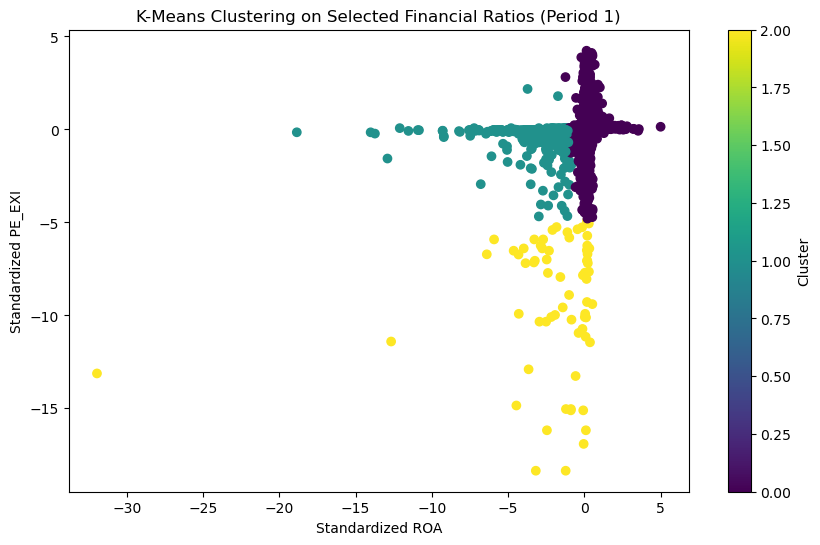

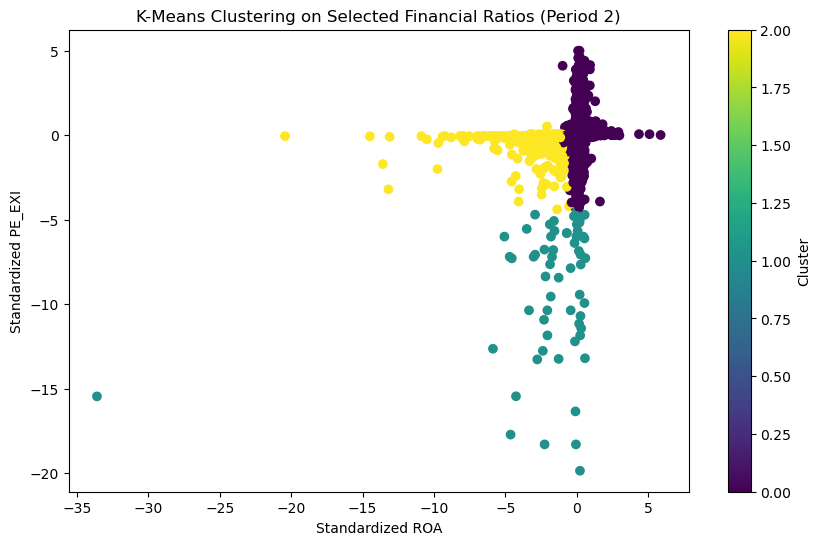

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define the sample size (e.g., 10,000 points)
sample_size = 10000

# Randomly sample the data for both periods
period_1_sample = period_1_data.sample(n=sample_size, random_state=42)
period_2_sample = period_2_data.sample(n=sample_size, random_state=42)

# Choose your financial ratios for clustering
selected_ratios_period_1 = period_1_sample[['roa', 'pe_exi']]
selected_ratios_period_2 = period_2_sample[['roa', 'pe_exi']]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
selected_ratios_period_1_imputed = imputer.fit_transform(selected_ratios_period_1)
selected_ratios_period_2_imputed = imputer.fit_transform(selected_ratios_period_2)

# Standardize the data
scaler = StandardScaler()
selected_ratios_period_1_scaled = scaler.fit_transform(selected_ratios_period_1_imputed)
selected_ratios_period_2_scaled = scaler.fit_transform(selected_ratios_period_2_imputed)

# Perform K-Means clustering for Period 1
kmeans_period_1 = KMeans(n_clusters=3, random_state=42)
clusters_period_1 = kmeans_period_1.fit_predict(selected_ratios_period_1_scaled)
period_1_sample['Cluster'] = clusters_period_1

# Perform K-Means clustering for Period 2
kmeans_period_2 = KMeans(n_clusters=3, random_state=42)
clusters_period_2 = kmeans_period_2.fit_predict(selected_ratios_period_2_scaled)
period_2_sample['Cluster'] = clusters_period_2



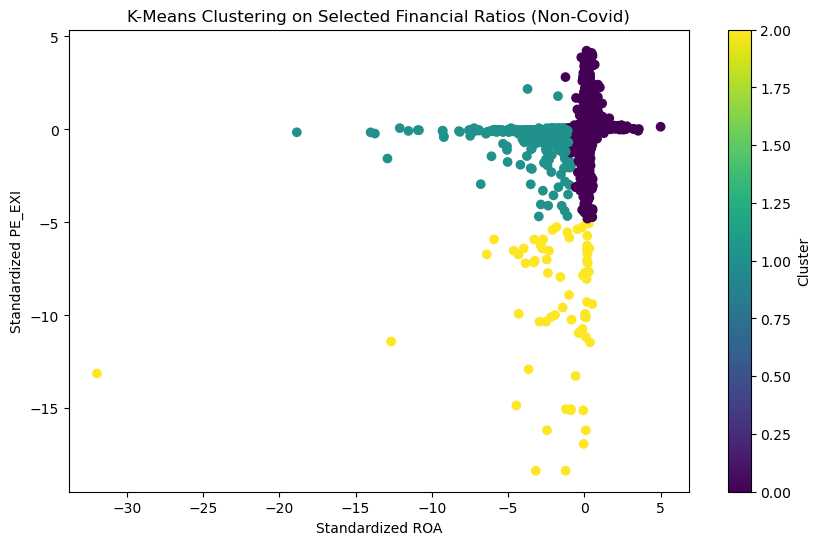

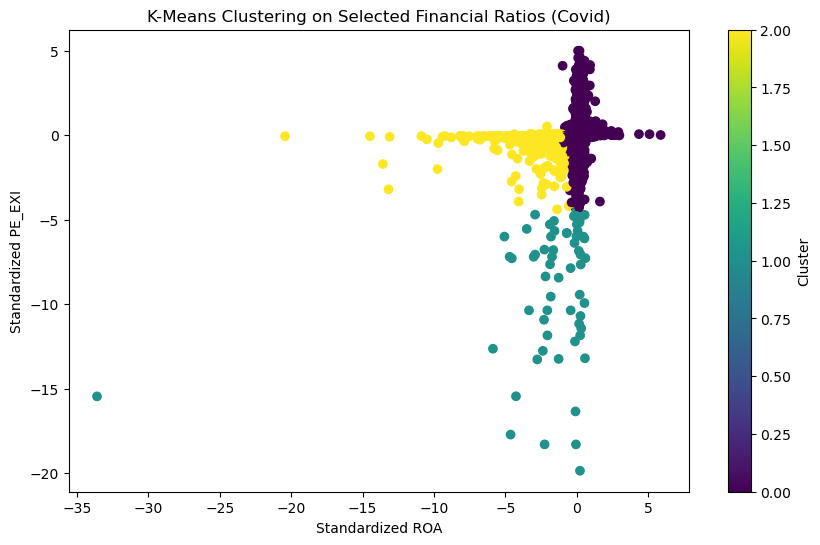

In [32]:
# Plot the clusters for Period 1
plt.figure(figsize=(10, 6))
plt.scatter(selected_ratios_period_1_scaled[:, 0], selected_ratios_period_1_scaled[:, 1], c=clusters_period_1, cmap='viridis')
plt.xlabel('Standardized ROA')
plt.ylabel('Standardized PE_EXI')
plt.title('K-Means Clustering on Selected Financial Ratios (Non-Covid)')
plt.colorbar(label='Cluster')
plt.savefig("/Users/rohanpadaya/Desktop/pankit_assign/kmeans_clusters_non_covid.png")
plt.show()

# Plot the clusters for Period 2
plt.figure(figsize=(10, 6))
plt.scatter(selected_ratios_period_2_scaled[:, 0], selected_ratios_period_2_scaled[:, 1], c=clusters_period_2, cmap='viridis')
plt.xlabel('Standardized ROA')
plt.ylabel('Standardized PE_EXI')
plt.title('K-Means Clustering on Selected Financial Ratios (Covid)')
plt.colorbar(label='Cluster')
plt.savefig("/Users/rohanpadaya/Desktop/pankit_assign/kmeans_clusters_covid.png")
plt.show()

In [34]:
# Check the distribution of clusters in both periods
print("Cluster distribution in COVID period:")
print(period_1_data['Cluster'].value_counts())

print("Cluster distribution in Non-COVID period:")
print(period_2_data['Cluster'].value_counts())

Cluster distribution in COVID period:
Cluster
0.0    9563532
1.0      45957
Name: count, dtype: int64
Cluster distribution in Non-COVID period:
Cluster
0.0    10344916
1.0       49611
Name: count, dtype: int64


In [33]:
# Calculate average returns for each cluster in both periods
avg_returns_covid = period_2_data.groupby('Cluster')['RET'].mean()
avg_returns_non_covid = period_1_data.groupby('Cluster')['RET'].mean()

print("Average Returns for Each Cluster during COVID Period (Feb 14, 2020 - Mar 20, 2020):")
print(avg_returns_covid)
print("\nAverage Returns for Each Cluster during Non-COVID Period (Dec 14, 2019 - Jan 20, 2020):")
print(avg_returns_non_covid)

Average Returns for Each Cluster during COVID Period (Feb 14, 2020 - Mar 20, 2020):
Cluster
0.0   -0.017205
1.0   -0.011627
Name: RET, dtype: float64

Average Returns for Each Cluster during Non-COVID Period (Dec 14, 2019 - Jan 20, 2020):
Cluster
0.0    0.002501
1.0    0.008171
Name: RET, dtype: float64


In [35]:
# Comparison between the two periods
comparison_df = pd.DataFrame({
    'Average Return (Non-COVID)': avg_returns_non_covid,
    'Average Return (COVID)': avg_returns_covid
})

print("Comparison of Average Returns Across Clusters:")
print(comparison_df)

Comparison of Average Returns Across Clusters:
         Average Return (Non-COVID)  Average Return (COVID)
Cluster                                                    
0.0                        0.002501               -0.017205
1.0                        0.008171               -0.011627


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

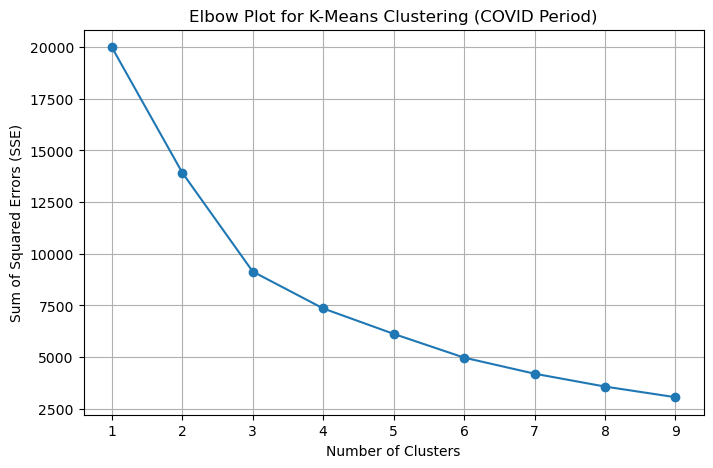

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of potential cluster numbers to test
cluster_range = range(1, 10)  # Testing from 1 to 10 clusters
sse = []  # List to store the sum of squared errors for each cluster count

# Generate the SSE for each cluster count
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_ratios_period_1_scaled)  # You can also try selected_ratios_period_2_scaled
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# Plotting the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot for K-Means Clustering (COVID Period)')
plt.grid(True)
plt.savefig("/Users/rohanpadaya/Desktop/pankit_assign/Elbow_plot.png")
plt.show()